<a href="https://colab.research.google.com/github/yooburi/alone_DL_study/blob/main/alone_study_deaplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 혼자 공부하는 머신러닝+딥러닝




---
\
## Chapter 1-3 마켓과 머신러닝
목표: 생선 이름을 자동으로 알려주는 머신 러닝을 만들어라.

KNN 알고리즘


In [ ]:
#35마리의 도미 데이터 준비하기.

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

matplotlib을 사용하면 데이터를 그래프로 시각화할 수 있다.

파이썬에서 과학계산용 그래프를 그리는 라이브러리.

산점도 그래프가 일직선에 가까운 형태를 **선형적**이라고 말함.

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') #x축은 길이
plt.ylabel('weight') #y축은 무게
plt.show() #2차원 그래프

In [ ]:
# 빙어 데이터 준비하기 14마리 빙어.

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


---
\
### K-Nearest Neighbors/K-최근접 이웃 알고리즘



해당 알고리즘을 사용하기 전에 준비한 도미와 방어 데이터를 하나의 데이터로 합치기.

파이썬에서 두개의 리스트를 더하면 하나의 리스트가 된다.

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

머신러닝 패키지인 사이킷런을 사용할 것이다.

패키지를 사용하려면 각 특성의 리스트를 세로 방향으로 늘어뜨린 **2차원 리스트**를 만들어야 한다.

zip()함수와 리스트 구문을 사용하여 length와 weight를 2차원 리스트로 만들기

In [ ]:
fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data) #49마리의 생선 데이터(2차원 리스트)

49개의 학습(입력)데이터를 모두 준비했다면 정답 데이터를 준비.

도미는 1 빙어는 0으로 표현한다면...

In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

사이킷런 패키지의 **k-최근접 이웃 알고리즘**을 구현한 클래스인 KNeighborsClassifier 사용.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier 클래스의 객체를 만들기
kn = KNeighborsClassifier()

위 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다. 이런 과정을 머신러닝에서는 **훈련**이라고 부른다. **fit()메소드가 학습 역할을 한다.**

In [ ]:
#학습 시키는 과정. train
kn.fit(fish_data, fish_target)

In [ ]:
#얼마나 잘 훈련되었는지 평가
kn.score(fish_data, fish_target)

> k-최근접 이웃 알고리즘은 **어떤 데이터에 대한 답을 구할 때 주위의 데이터를 보고 다수를 차지하는 것을 정답으로 사용**한다. 즉, 주위의 데이터로 현재 데이터를 판단하는 것.

kn.predict를 통해 새로운 데이터의 정답을 예측할 수도 있다.

In [ ]:
kn.predict([[30,600]])

* **k-최근접 이웃 알고리즘의 한계**

데이터가 아주 많은 경우 사용하기 어렵다. 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는데 많은 시간이 필요하다.

그리고 실제로 이 알고리즘은 무언가 훈련되는것이 없는 셈이다. 학습 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 구분한다. **가까운 몇 개의 데이터를 참고하느냐에 따라(매개변수) 성능이 달라지게 된다.**

기본값은 5인데 49개로 하는경우..

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

---
\
### Summary

KNN 알고리즘은 가장 간단한 머신러닝 알고리즘.

사실 어떤 규칙을 찾는다기 보다는 전체 데이터를 메모리에 가지고 있고 새로운 데이터와 비교하는 것이 전부.

\
[scikit-learn]

KNeighborsClassifier(): k-최근접 이웃 분류 모델 만드는 클래스\
fit(): 사이킷런 모델을 훈련\
predict(): 사이킷런 모델을 훈련하고 예측\
score(): 훈련된 사이킷런 모델의 성능을 측정.


In [ ]:
#mission: n_neighbors 늘려가며 score가 낮아지기 시작하는 지점을 찾기.
for n in range(5,50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = kn.n_neighbors + 1

    #점수 계산
    score = kn.score(fish_data, fish_target)

    if score <1:
      print(n, score)
      break

---
\

##Chapter 2-1 훈련세트와 테스트 세트

머신 러닝의 알고리즘은 크게 지도 학습과 비지도 학습으로 나눌 수 있다.

\
- 지도 학습 \
지도 학습 알고리즘은 훈련하기 위한 **데이터와 정답**이 필요하다. \
 **데이터와 정답을 input과 target이라고 하고 이를 합쳐 훈련 데이터**라고 부른다. 입력으로 사용된 길이와 무게를 **특성(feature)**이라고 한다.

- 비지도 학습 \
정답 타깃 없이 입력 데이터만 사용하는 알고리즘

---
\

### 훈련 세트와 테스트 세트

머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다.

**훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않은 방식.** 보통은 훈련 데이터의 일부를 떼어 테스트 세트로 사용한다.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#두 생선 길이와 무게에 대한 리스트를 2차원 리스트로 만듦.
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

하나의 생선 데이터를 샘플이라고 한다. 도미 35샘플, 빙어 14샘플이 있는 상태. 각 샘플에 사용하는 특성은 길이와 무게 2개.

처음 데이터 35개를 훈련, 나머지 14개를 테스트 세트로 사용해보자.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

파이썬의 슬라이싱을 사용.

마지막 인덱스는 포함되지 않는 것에 유의하자.

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

학습 성능을 나타내는 score값이 0이다. 문제는 샘플링 편향.

**훈련 세트와 테스트 세트를 나누려면 데이터들이 골고루 섞이게 만들어야 한다.**

---
\
**Numpy**

파이썬의 리스트로 2차원 리스트를 표현할 수 있지만 고차원 리스트를 표현하기에는 매우 번거롭다.

파이썬 리스트를 numpy 배열로 바꾸는 것은 정말 쉽다. numpy의 array()함수에 파이썬 리스트를 전달하면 끝이다.


In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#print(input_arr)
print(input_arr.shape) #배열의 크기를 알려줌. (샘플, 특성 수)

이제 편향성을 없애주기 위해 무작위로 샘플을 고르는 방식을 선택해보자.

주의해야할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다는 점이다.

 아예 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 나누는 셈이 된다.

In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index) #랜덤한 순서로 인덱스 생성.

numpy의 arange()함수에 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열을 만든다.

random 패키지 아래에 있는 shuffle() 함수는 주어진 배열을 무작위로 섞는다. **즉, 인덱스가 들어있는 리스트**

***numpy 배열을 인덱스로 전달할 수 있다.***

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(input_arr[13], train_input[0])

***train_input의 첫 번째 원소는 input_arr의 열 네 번째 원소가 들어 있을 것이다.***

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

시각화해보면 랜덤하게 섞여 있는 것을 볼 수 있다. 이 데이터들로 훈련을 시켜보면..

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

**1.0이 나왔다면 100%의 확률로 테스트 세트에 있는 모든 생선을 맞췄다는 것이다.**

predict()로 테스트 세트의 예측 결과와 실제 타깃을 확인해보자. 참고로 결과로 나오는 array는 모두 numpy 배열이다.

In [ ]:
kn.predict(test_input)

---
\

### Summary
**지도 학습**: 입력과 타깃을 전달하여 모델을 학습시킨 다음 새로운 데이터로 예측하는 과정. KNN도 지도 학습 알고리즘이다.

**비지도 학습**: 타깃 데이터가 없음. 즉, 정답이 없음. 입력 데이터에서 어떤 특징을 찾는 데 주로 활용한다.

**훈련 세트**: 클수록 좋다.

\

올바른 학습을 시키기 위해서는 훈련 세트와 테스트 세트로 나누어야 한다. 샘플링할 때는 데이터가 편향되면 안되고 랜덤하게 골고루 있어야 한다.


\

* numpy arange(): 일정한 간격의 정수 또는 실수 배열을 만든다. 기본 간격은 1. 매개변수가 3개면 마지막 매개변수가 간격을 나타낸다.

---

\
##Chapter 2-2 데이터 전처리


우선 기존 리스트가 아닌 넘파이로 데이터를 준비해보자.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

이전에는 이 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성하였다. numpy를 사용하면 엄청 간단하게 가능하다!

In [ ]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

print(fish_data.shape)

넘파이의 column_stack()은 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다.

target(정답) 데이터도 넘파이를 통해 간단하게 만들 수 있다.

In [ ]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

print(fish_target)
print(fish_target.shape)

concatenate()은 전달받은 리스트를 1차원으로 연결해준다.

\

이제 사이킷런을 이용하여 훈련 세트와 테스트 세트를 나누어보자.

기존에 인덱스를 직접 섞어 썼다면 train_test_split()를 이용하여 쉽게 나눌 수 있다. 기본적으로 25%를 테스트 세트로 떼어 낸다.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

#도미와 빙어가 잘 섞였는지..
print(test_target)

잘 섞여있지 않은 것을 알 수 있다. 일부 클래스의 개수가 적을 때 이런 일이 발생할 수 있다.

**stratify 매개변수에 target 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.**

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target , random_state=42)

#클래스의 비율에 맞아졌다.
print(test_target)

---
\

KNN 알고리즘을 이용한 학습


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

In [ ]:
# 학습이 잘 되었지만 애매한 도미를 잡지 못함.
print(kn.predict([[25,150]]))

다른 데이터들과 함께 matplot해보면..

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

KNN 알고리즘은 기본적으로 가까운 5개의 데이터를 기준으로 판단하는데 새로운 데이터에 대해 빙어가 더 가깝다.

In [ ]:
distances, indexes = kn.kneighbors([[25,150]]) # 훈련 데이터 중 이웃 샘플 인덱스 저장

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(train_input[indexes])
print(train_target[indexes])
print(distances)

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**x축과 y축의 scale이 현저하게 달라서 알고리즘이 올바르게 예측할 수가 없다.**

특히 거리 기반인 경우 샘플 간 거리에 영향을 많이 받게 되므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 한다.

### 데이터 전처리

가장 널리 사용하는 전처리 방법 중 하나는 '표준점수'

고등학교 때 배웠던 분산과 표준편자 개념이다. 평균에서 얼마나 떨어져 있는지 나타내는 척도.

In [ ]:
mean = np.mean(train_input, axis=0) # 평균 계산
std = np.std(train_input, axis=0) # 표준편차 계산

print(mean, std)

특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 한다. 그래서 axis=0으로 지정.

**train_input의 경우 (36,2) 배열인데 axis=0이므로 두 줄에 대한 평균과 표준편차를 계산한 것.**

In [ ]:
train_scaled = (train_input - mean) / std #표준점수로 반환한 학습데이터들

In [ ]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

무게와 길이의 scale이 비슷해졌다. 이제 knn 알고리즘을 적용하면..

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target) #1.0이 나왔다. 테스트 샘플을 완벽하게 분류한 것.

print(kn.predict([new]))

In [ ]:
distances,indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

특성 값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있게 되었다.

---
\

###Summary

데이터 전처리란 훈련 데이터를 넣기 전에 가공하는 단계를 말한다. 올바른 학습을 위해서는 필수적인 과정이다.

표준점수는 훈련 데이터의 scale을 바꾸는 대표적인 방법 중 하나. 표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나눈다.

**브로드캐스팅이란 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능이다.**


---

\
##Chapter 3-1 회귀 알고리즘 / k-최근접 이웃 회귀

회귀 regression

지도학습은 크게 '분류'와 '회귀'로 나뉜다.

분류는 말 그대로 샘플을 몇 개의 클래스 중 하나로 분류하는 문제이다.

**'회귀'란 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다.** 예를 들면 내년 경제 성장률을 예측하거나, 배달이 도착할 시간을 예측하는 것이 회귀 문제이다.

k-최근접 알고리즘이 분류와 회귀에 적용되는 방식을 비교해보자.

분류는 예측하려는 샘플에 가장 가까운 샘플 k개를 선택해서 다수 클래스를 새로운 클래스로 예측한다.

\

k-최근접 이웃 회귀도 간단하다.샘플에 가장 가까운 샘플 k개를 선택한다. 하지만 회귀이기 때문에 어떤 클래스가 아닌 수치이다. 가장 간단한 방법은 평균을 때리기.


In [ ]:
#데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이가 늘어남에 따라 무게가 늘어나고 있다.

In [ ]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#print(train_input.shape, test_input.shape)
train_input

사이킷런에 사용할 훈련 세트는 2차원 배열이여야 한다.

그래서 1차원 배열을 1개의 열이 있는 2차원 배열로 만들어주어야 한다.
**(42,) 에서 (42,1)로.**

\

[1,2,3]은 크기가 (3,)이다. 파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다.

우리는 이를 2차원 배열로 만들기 위해 억지로 하나의 열을 추가해주어야 한다.

**이번 예제에서는 1개의 특성만을 활용하기에 수동으로 2차원 배열을 만들어주어야 한다.**

reshape() 함수를 사용하는데 중요한 점은 사이즈에 유의하여야 한다는 점.

In [ ]:
train_input= train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape,test_input.shape)

-1의 의미는 행의 개수는 너가 알아서 결정해라라는 의미이다.

1은 1열을 가지도록 만들어주는 역할을 한다.

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor이다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

knr.score은 무엇일까??

기존에 공부했던 분류의 경우 테스트 세트에서 정확하게 분류한 비율을 말한다.

회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 그래서 회귀의 경우 조금 다른 방식으로 평가를 한다. 바로 결정 계수라는 것이다.

---
\

### 결정계수 / 과적합&과소적합

1. 결정계수

$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

각 샘플의 정답과 예측한 값의 차이를 제곱하여 더하기

각 샘플의 정답과 정답 평균의 차이를 제곱하여 더하여 나누기

예측이 정답에 아주 가까워지면 1에 가까운 값이 된다.

\

정답과 예측한 값의 차이를 정확하게 봐보자.

In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction= knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

예측이 평균적으로 19g 정도 다르다는 것을 알 수 있다.

\

2. 과대적합 & 과소적합

모델은 훈련 세트에 잘 맞는 모델이 만들어진다. 보통은 train set에서 test set보다 높은 score이 나온다. 하지만 **만약 훈련 세트에서 점수가 좋았는데 테스트 세트에서 점수가 나쁘다면 overfitting**되었다고 말한다. 즉, 훈련세트에만 잘 맞는 모델이라 실전에 투입하여 잘 동작하지 않을 수 있다는 것이다.

반면에 train set보다 test set 점수가 높거나 둘 다 낮은 경우는 underfitting되었다고 말한다. **즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다.**

> ***그래서 우리는 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습시키는 것이 중요하다.***



우리가 실습한 예제는 과소적합에 해당한다. 모델을 좀 더 복잡하게 만들어 훈련 세트에 잘 맞게 만들면 테스트 점수는 조금 낮아질 것이다.

knn이웃 회귀에서 복잡하게 만들려면 참조하는 이웃의 개수를 줄이면 된다. 그러면 국지적으로 더 민감해지게 된다.


In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

---

\

### Summary
회귀란 임의의 수치를 예측하는 문제이다. 그래서 정답값도 임의의 수치이다.

k-최근접 이웃 회귀는 가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측으로 삼는다.

\

overfitting: 훈련 세트에만 너무 치중되어 일반화하기 힘든 모델

underfitting: 너무 단순하여 사용하기 적합하지 않은 상태.

**우리는 최적의 모델을 만들기 위해 훈련 데이터를 적절하게 잘 학습시켜야 한다.**

In [ ]:
#mission: 과적합과 과소적합 이해를 위해 복잡한 모델과 단순한 모델 비교.

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1,1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

plt.plot(x, prediction)으로 그려지는 선은 KNeighborsRegressor 모델이 n_neighbors 파라미터 값에 따라 입력 x에 대해 어떻게 예측 값을 생성하여 데이터의 패턴을 시각적으로 표현하는지를 나타낸다.

각 x값에 대한 예측값.

---
\

## Chapter 3-2 선형 회귀(Linear Regression)

k-최근접 이웃의 한계..

데이터 준비를 해보자.

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련 세트와 테스트 세트로 나누기 후 2차원 배열로 반환

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
# 최근접 이웃 개수를 3으로 하는 모델 훈련.

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]])) #50cm의 농어의 무게를 예측

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 50dml 농어의 주변 이웃 3마리

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#100cm 농어 데이터
print(knr.predict([[100]]))

**knn 최근접 이웃 알고리즘은 가장 가까운 데이터의 평균으로 예측하기 떄문에 45cm 근방의 농어들로 무게를 예측하게 된다.**

**즉, 100cm의 농어를 plot 해봐도 1033g으로 예측하게 된다.**

크기가 큰 농어가 포함되도록 훈련 세트를 다시 만들어야 한다...이는 너무 불편하다.

---
\

### 선형 회귀
학습 데이터의 특성을 가장 잘 나타낼 수 있는 직선을 찾는 것이 선형 회귀.

사이킷런의 LinearRegression 클래스로 선형 회귀 알고리즘을 구현할 수 있다.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

**데이터를 가장 잘 표현하는 직선의 방정식을 찾아 데이터에서 동떨어져 있어도 예측할 수 있게 된다.**

In [ ]:
#직선의 방정식의 계수
#기울기, y절편
print(lr.coef_, lr.intercept_)

> **기울기와 절편을 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부른다. 훈련의 과정은 최적의 모델 파라미터를 찾는 것과 같다.**


In [ ]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) #테스트 세트

훈련 세트와 테스트 세트의 결정계수 R^2점수를 확인하면 위와 같은데 그렇게 높은 점수가 아니다. 그래프를 보면 오히려 데이터를 잘 대변하지 않음을 볼 수 있다.

\
데이터를 대변하는 다항 회귀로 우리는 눈을 넓힐 수 있다.

**2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 한다.** 브로드캐스팅이 적용되어 모든 원소를 제곱한다. column_stack 함수를 적용하여 두 열을 나란히 붙이기.

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape , test_poly.shape)

**훈련 세트에 제곱항을 추가했지만, 타깃값인 정답값은 그대로 사용한다. 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.**

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(train_poly, train_target)

print(lr_2.predict([[50**2, 50]]))

print(lr_2.coef_, lr_2.intercept_) #이차함수의 계수

In [ ]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

결정계수를 확인해보면..

In [ ]:
print(lr_2.score(train_poly, train_target))
print(lr_2.score(test_poly, test_target))

여전히 테스트 세트의 점수가 높은 것을 볼 수 있다. **과소적합이 남아 있는 것...** 조금 더 복잡한 모델이 필요한 것.

---
\

### Summary
훈련 데이터에서 떨어져 있는 데이터를 얘측하기 위해 훈련데이터를 잘 설명하는 다항식으로 우리는 회귀를 이용해야 한다.

선형 회귀가 찾은 특성과 타깃 사이의 관계는 선형 방정식의 계수 또는 가중치에 저장된다. 이는 모델 파라미터이고 모델이 특성에서 학습한 파라미터를 의미하게 된다.

\

---

\
##Chapter3-3 여러 특성을 이용한 다중 회귀

3-2에서는 하나의 특성을 이용하여 선형 회귀 모델을 학습시켰다. 여러 개의 특성을 사용한 선형 회귀를 다중 회귀라고 한다. 다중 회귀를 이용할 경우 여러 데이터를 참조하므로 학습률일 올라갈 수 있다.

2개의 특성을 사용하면 선형 회귀는 평면을 학습한다.

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLcHZ13IjCjaSRLOVmb9PJni-GeVyDmoWTlw&s)

**모델의 성능을 높이기 위해 기존의 특성을 이용해 새로운 특성을 뽑아내기도 한다. 이를 특성 공학이라고 한다.**

\

데이터 준비를 해보자. 특성이 늘어났기 때문에 데이터를 복사해 붙여넣기 번거롭다. 판다스라는 유명한 데이터 분석 라이브러리를 사용해보자.

> **판다스를 이용해 농어 데이터를 인터넷에서 받아 데이터프레임에 저장하고 넘파이 배열로 변환하여 선형 회귀 모델을 훈련해 보자. 판다스 데이터프레임을 만들기 위해 csv를 많이 쓴다.**

In [1]:
#데이터 준비
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')

perch_full = df.to_numpy()
print(perch_full)

#타깃 데이터
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

이 데이터들을 이용해서 **새로운 특성**을 만들어보자.

\

사이킷런에서는 특성을 만들거나 전처리하기 위해 다양한 클래스를 제공하는데 이를 **transformer(변환기)**이라고 한다. 앞서 사용했던 LinearRegression 같은 클래스는 추정기라고 불린다.

**이번 챕터에서 사용할 변환기는 PolynomialFeatures 클래스.**


In [3]:
#example
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


fit()메소드는 새롭게 만들 특성 조합을 찾고 transform() 함수는 실제로 데이터를 변환한다. 변환기는 입력 데이터를 변환하는데 타깃 데이터가 필요하지 않다. 그래서 fit() 함수에 입력 데이터만 전달.

PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 곱한 항을 추가.

$${무게 = a*길이 + b*높이 + c*두께 + d*1}$$
절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있어서 1이 추가된다. 특성은 (길이,높이,두께,1). 하지만 사이킷런 모델은 자동으로 절편을 추가하므로 굳이 특성을 이렇게 만들 필요가 없다.

\

**이제 이 방식으로 train_input에 적용해보자.** train_input을 변환한 데이터를 train_poly에 저장하고 배열의 크기를 확인헤보자.

In [4]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

poly.get_feature_names_out()

(42, 9)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

x0은 첫번째 특성을 의미하고 특성을 조합하여 새로운 특성을 만드는 것을 볼 수 있다.

이제 테스트 세트를 변환

In [5]:
test_poly = poly.transform(test_input)

\

---
###다중회귀 모델 훈련하기
다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다. 다만, 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것일 뿐이다.

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 과소적합이 더이상 일어나지 않는다.

0.9903183436982125
0.9714559911594111


> **농어의 길이 뿐만이 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가했다. 특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있다.**

In [7]:
#특성을 더 많이 늘려보자...
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape) #특성의 개수가 55개

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999996433
-144.40579436844948


훈련 세트에 대한 점수가 매우매우 높지만 테스트 세트에 대한 점수가 음수가 되었다.

> **특성의 개수를 늘리면 선형 모델은 매우 강력해지지만, 이런 모델은 훈련 세트에 너무 과적합되어 테스트 세트에서는 형편없는 점수를 만들어 낸다.**

\

---
###과적합을 줄이는 방법... Regularization 규제
규제란 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉, 모델이 훈련 세트에 과적합되지 않도록 만드는 것이다.

선형 회귀 모델에서 규제는 특성에 곱해지는 계수의 크기를 작게 만드는 일.

![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcjkJYo%2FbtqDyMXkXB8%2FAAAAAAAAAAAAAAAAAAAAACzMvQpf6udGMOWbr9SQOuU_rpvAgS6dmaADjFy2Dr_r%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DZd5Y0DVb3Y9V8q4sMQMrf2s449U%253D)

**가장 오른쪽은 과도하게 학습했고 가운데는 기울기를 줄여 보다 보편적인 패턴을 학습하고 있다.**


앞서 55개의 특성으로 훈련했던 선형 회귀 모델의 계수를 '규제'하여 훈련 세트의 점수를 낮추고 보다 보편적인 학습 데이터를 만들어보자..

\

2장에서 배운 내용 중에 특성의 스케일이 다르면(**정규화되지 않으면**) 곱해지는 계수 값도 많이 차이 나게 된다. 그래서 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것이다.
> 따라서 규제를 적용하기 전에 정규화를 먼저 진행해야 한다. 꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트도 변환해야 한다.

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #표준점수.. 평균과 표준편차 가지고 있음.
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) #꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트도 변환해야 한다.

\

### 릿지 회귀
선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다. 두 모델은 규제를 가하는 방법이 다르다.

> **릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고,**

> **라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.**

사이킷런 모델이 편리한 점은 훈련하고 사용하는 방법이 항상 같다는 것이다.

In [9]:
#릿지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


확실히 많은 특성을 사용했음에도 과적합이 일어나지 않고 테스트 세트에서도 좋은 성능을 보여주고 있다.

릿지와 라쏘 모델을 활용할 때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절할 수 있는데 alpha값이 크면 규제 강도가 세지므로 계수 값을 줄이고 더 과소적합을 유도한다.

> **이 alpha값은 스스로 학습할 수 없고 사용자가 알려줘야 하는 하이퍼 파라미터라고 한다.**

그렇다면 어떻게 적절한 alpha값을 찾을 수 있을까?

> **alpha값에 대한 R^2 값의 그래프를 그려보는 것이다. 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.**
릿지와 라쏘 모델에서 최적의 alpha 값을 찾는 방법.

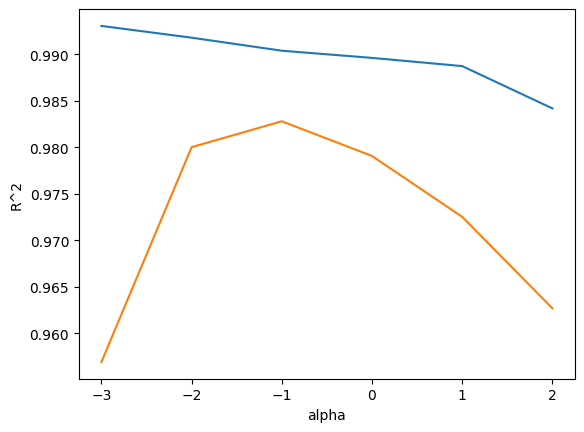

In [10]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #릿지 모델
  ridge = Ridge(alpha=alpha)
  #훈련
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha가 0.1일 때 최적이다.

In [11]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


\

---
### 라쏘 회귀

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


라쏘도 과적합을 잘 억제하는 모습을 보여준다. 라쏘도 alpha값으로 규제의 강도를 조절할 수 있다.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


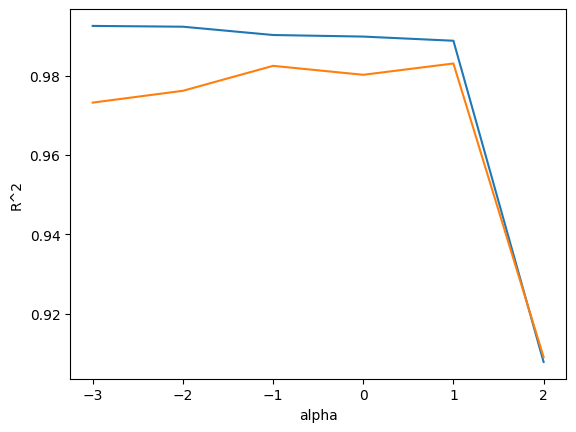

In [14]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

라쏘 회귀에서 최적의 alpha 값은 10.

In [17]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


\

---
### Summary
다중 회귀: 여러 개의 특성을 사용하는 회귀 모델. 특성이 많으면 선형 모델은 강력한 성능을 발휘하지만 과적합이 발생할 수 있다. 과적합이란 훈련세트에만 너무 맞춰진 모델을 말한다.

\

특성 공학: 주어진 특성을 조합하여 새로운 특성을 만들어 사용할 수 있다.

\

릿지: 규제가 있는 선형 회귀 모델로 선형 모델의 계수를 작게 만들어 과적합을 완화시킨다.

\

라쏘: 또 다른 규제가 있는 선형 회귀 모델. 릿지와 달리 계수 값을 아예 0으로 만들 수 있다.

\

하이퍼 파라미터: 머신러닝 알고리즘에서 학습하지 않는 파라미터. 사람이 사전에 지정해야 한다. 릿지와 라쏘에서 규제 강도인 alpha값이 하이퍼 파라미터.